In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
main_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

----

### Задание 2.1 ###

Прочитайте данные с помощью библиотеки Pandas. Перед чтением обратите внимание на разделитель внутри файла.
Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).

In [3]:
main_df.shape

(44744, 12)

----

### Задание 2.2 ###

Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.
В каком формате представлен порядок слов в признаке «Пол, возраст»?

***Ответ - <Пол , возраст , дата рождения>***

In [4]:
main_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


----

### Задание 2.3 ###

Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.
Какой тип данных имеют все столбцы? Введите его в поле для ответа.

***Ответ - object***

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

----

### Задание 2.4 ###

Обратите внимание на информацию о числе непустых значений.
Выберите все признаки, в которых есть пропуски в данных:

***Ответ***
- Последняя/нынешняя должность
- Опыт работы
- Последнее/нынешнее место работы

----

### Задание 2.5 ###

Выведите основную статистическую информацию о столбцах.
Сколько уникальных значений содержится в столбце «Опыт работы»?

***Ответ - 44413***

Какая из искомых должностей самая распространённая?

***Ответ - Системный администратор***

In [6]:
main_df.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


----

###  Задание 3.1 ###

Сколько соискателей имеет средний уровень образования (школьное образование)?

***Ответ - 559***

In [7]:
display(main_df['Образование и ВУЗ'])

def get_graduation(string_: str) -> str:
    list_ = string_.split(' ')
    if list_[1] == 'образование':
        return list_[0]
    else:
        return list_[0] + ' ' + list_[1]
    return None

main_df['Образование'] = main_df['Образование и ВУЗ'].apply(get_graduation)
print('Уникальных значений образования -', main_df['Образование'].nunique())
display(main_df['Образование'].value_counts())

0        Неоконченное высшее образование 2000  Балтийск...
1        Высшее образование 1981  Военно-космическая ак...
2        Среднее специальное образование 2002 Профессио...
3        Высшее образование 2002  Саратовский государст...
4        Высшее образование 2015 Кгу Психологии и педаг...
                               ...                        
44739    Высшее образование 2015  Московский гуманитарн...
44740    Высшее образование (Бакалавр) 2016  Воронежски...
44741    Высшее образование 2000  Южно-Уральский госуда...
44742    Высшее образование 2015  Тамбовский государств...
44743    Высшее образование 1997  Южно-Российский госуд...
Name: Образование и ВУЗ, Length: 44744, dtype: object

Уникальных значений образования - 4


Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

In [8]:
def get_graduation_year(string_: str) -> int:
    return int(re.search(r'\d{4}', string_).group(0))

main_df['Год выпуска'] = main_df['Образование и ВУЗ'].apply(get_graduation_year)
print('Уникальных значений года выпуска -', main_df['Год выпуска'].nunique())
display(main_df['Год выпуска'].value_counts())
display(main_df.info())

Уникальных значений года выпуска - 62


2015    3004
2013    2756
2014    2705
2012    2674
2011    2654
        ... 
2028       3
2029       2
1954       1
1969       1
1972       1
Name: Год выпуска, Length: 62, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
 12  Образование                     

None

----

### Задание 3.2 ###

Сколько процентов женских резюме представлено в наших данных?

(Ответ округлить до сотых)

***Ответ - 19.07***

Чему равен средний возраст соискателей? Ответ округлите до десятых.

***Ответ - 32.2***

In [9]:
display(main_df['Пол, возраст'])

main_df['Пол'] = main_df['Пол, возраст'].apply(lambda x: x[0])
display(main_df['Пол'].value_counts())
print(round(main_df[main_df['Пол'] == 'Ж'].shape[0] / main_df['Пол'].shape[0] * 100, 2))

0          Мужчина ,  39 лет , родился 27 ноября 1979
1           Мужчина ,  60 лет , родился 20 марта 1959
2        Женщина ,  36 лет , родилась 12 августа 1982
3            Мужчина ,  38 лет , родился 25 июня 1980
4           Женщина ,  26 лет , родилась 3 марта 1993
                             ...                     
44739      Мужчина ,  30 лет , родился 17 января 1989
44740        Мужчина ,  27 лет , родился 5 марта 1992
44741    Женщина ,  48 лет , родилась 26 декабря 1970
44742     Мужчина ,  24 года , родился 6 октября 1994
44743      Мужчина ,  38 лет , родился 25 апреля 1980
Name: Пол, возраст, Length: 44744, dtype: object

М    36211
Ж     8533
Name: Пол, dtype: int64

19.07


In [10]:
def get_age(string_: str) -> int:
    age_str = string_.split(',')[1].strip()
    return int(re.search(r'\d+', age_str).group(0))

##### main_df['Возраст'] = main_df['Пол, возраст'].apply(lambda x: x.split(',')[1].strip())
main_df['Возраст'] = main_df['Пол, возраст'].apply(get_age)
print(round(main_df['Возраст'].mean(), 2))

32.2


----

### Задание 3.3 ###

Чему равен медианный опыт работы (в месяцах) в таблице?

***Ответ - 100***

In [11]:
wtf_test = main_df['Опыт работы'].apply(lambda x: x[:10] if type(x) == str else None)
display(wtf_test.value_counts())

Опыт работ    44574
Не указано        2
Name: Опыт работы, dtype: int64

In [12]:
def convert_experience_to_months(string_: str) -> int:
    try:
        experience = string_.strip('Опыт работы ').split(maxsplit=3)
        if experience[1][0] == 'м':
            experience_months = int(experience[0])
        else:
            experience_months = int(experience[0]) * 12
            if experience[2].isdecimal():
                experience_months += int(experience[2])
        return experience_months
    except:
        return None

main_df['Опыт работы (месяц)'] = main_df['Опыт работы'].apply(convert_experience_to_months)
main_df.drop('Опыт работы', axis='columns', inplace=True)
print('Медианный опыт работы:', main_df['Опыт работы (месяц)'].median())
display(main_df.info())

Медианный опыт работы: 100.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Пол, возраст                     44744 non-null  object 
 1   ЗП                               44744 non-null  object 
 2   Ищет работу на должность:        44744 non-null  object 
 3   Город, переезд, командировки     44744 non-null  object 
 4   Занятость                        44744 non-null  object 
 5   График                           44744 non-null  object 
 6   Последнее/нынешнее место работы  44743 non-null  object 
 7   Последняя/нынешняя должность     44742 non-null  object 
 8   Образование и ВУЗ                44744 non-null  object 
 9   Обновление резюме                44744 non-null  object 
 10  Авто                             44744 non-null  object 
 11  Образование                      44744 non-null  ob

None

----

### Задание 3.4 ###

Сколько процентов соискателей живут в Санкт-Петербурге?

(Ответ округлить до целого)

***Ответ - 11***

Сколько процентов соискателей готовы одновременно и к переездам, и к
командировкам?

(Ответ округлить до целого)

***Ответ - 32***

In [13]:
def extract_city(string_: str) -> str:
    million_cities = ['Новосибирск',
                      'Екатеринбург',
                      'Нижний Новгород',
                      'Казань',
                      'Челябинск',
                      'Омск',
                      'Самара',
                      'Ростов-на-Дону',
                      'Уфа',
                      'Красноярск',
                      'Пермь',
                      'Воронеж',
                      'Волгоград']
    city = string_.split()[0]
    if city in ['Москва', 'Санкт-Петербург']:
        city_category = city
    elif city in million_cities:
        city_category = 'город-миллионник'
    else:
        city_category = 'другие'
    return city_category

main_df['Город'] = main_df['Город, переезд, командировки'].apply(extract_city)
main_df['Город'] = main_df['Город'].astype('category')
display(main_df['Город'].value_counts())
pitermen = main_df[main_df['Город'] == 'Санкт-Петербург'].shape[0]
print('Процент питерских:', round(pitermen / main_df.shape[0] * 100))

Москва              16621
другие              16452
город-миллионник     6734
Санкт-Петербург      4937
Name: Город, dtype: int64

Процент питерских: 11


In [14]:
print(main_df['Город, переезд, командировки'].values)

['Советск (Калининградская область) , не готов к переезду , не готов к командировкам'
 'Королев , не готов к переезду , готов к редким командировкам'
 'Тверь , не готова к переезду , не готова к командировкам' ...
 'Челябинск , готова к переезду , готова к редким командировкам'
 'Тамбов , не готов к переезду , не готов к командировкам'
 'Москва , не готов к переезду , не готов к командировкам']


In [15]:
def is_ready_for_move(string_: str) -> bool:
    if 'не готов к переезду' in string_ \
        or 'не готова к переезду' in string_:
            return False
    elif 'перее' not in string_:
            return False
    else:
            return True

def is_ready_for_mission(string_: str) -> bool:
    if 'не готов к командировкам' in string_ \
        or 'не готова к командировкам' in string_:
            return False
    elif 'командиров' not in string_:
            return False
    else:
            return True

main_df['Готовность к переезду'] \
    = main_df['Город, переезд, командировки'].apply(is_ready_for_move)
main_df['Готовность к командировкам'] \
    = main_df['Город, переезд, командировки'].apply(is_ready_for_mission)
mask1 = main_df['Готовность к переезду'] == True
mask2 = main_df['Готовность к командировкам'] == True
print('Процент готовых к переезду и командировкам:',
      round(main_df[mask1 & mask2].shape[0] / main_df.shape[0] * 100))

Процент готовых к переезду и командировкам: 32


----
### Задание 3.5 ###

Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит
`True`)?

***Ответ - 436***

Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих
столбцах стоит `True`)?

***Ответ - 2311***

In [16]:
# hh_set_ini['Занятость'].value_counts()
employments_list = ['полная занятость',
                    'частичная занятость',
                    'проектная работа',
                    'стажировка',
                    'волонтерство'
                   ]

# hh_set_ini['График'].value_counts()
schedules_list = ['полный день',
                  'гибкий график',
                  'сменный график',
                  'вахтовый метод',
                  'удаленная работа'
                 ]

for employment in employments_list:
    main_df[employment] = main_df['Занятость'].aggregate(lambda x: True if employment in x else False, axis='index')

for schedule in schedules_list:
    main_df[schedule] = main_df['График'].aggregate(lambda x: True if schedule in x else False, axis='index')

print('Первый ответ:',
     main_df[main_df['проектная работа'] & main_df['волонтерство']].shape[0])
print('Второй ответ:',
     main_df[main_df['вахтовый метод'] & main_df['гибкий график']].shape[0])

main_df.drop(['Занятость', 'График'], axis='columns', inplace=True)

Первый ответ: 436
Второй ответ: 2311


----
### Задание 3.6 ###

Для выполнения этого задания у вас будет 5 попыток. После того как вы дадите
правильный ответ ИЛИ истратите все попытки, вы можете нажать на кнопку «Показать
ответ»: в конце решения вы увидите ссылку на эталонный ответ.

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в
рублях)?

Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас
получилась медианная з/п 42 127, в качестве ответа укажите 42.

***Ответ - 59***

In [17]:
rates_df = pd.read_csv('data/ExchangeRates.csv', sep=',')
display(rates_df.iloc[4500:4510])
display(rates_df.info())

,currency,per,date,time,close,vol,proportion
4500,UZS,D,07/09/18,00:00,87.1963,0,10000
4501,UZS,D,08/09/18,00:00,88.0141,0,10000
4502,UZS,D,09/09/18,00:00,88.0141,0,10000
4503,UZS,D,10/09/18,00:00,88.0141,0,10000
4504,UZS,D,11/09/18,00:00,89.0850,0,10000
4505,UZS,D,12/09/18,00:00,89.0016,0,10000
4506,UZS,D,13/09/18,00:00,88.4908,0,10000
4507,UZS,D,14/09/18,00:00,87.3005,0,10000
4508,UZS,D,15/09/18,00:00,86.8498,0,10000
4509,UZS,D,16/09/18,00:00,86.8498,0,10000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5664 entries, 0 to 5663
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   currency    5664 non-null   object 
 1   per         5664 non-null   object 
 2   date        5664 non-null   object 
 3   time        5664 non-null   object 
 4   close       5664 non-null   float64
 5   vol         5664 non-null   int64  
 6   proportion  5664 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 309.9+ KB


None

In [18]:
main_df['Обновление резюме'] = pd.to_datetime(main_df['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date
rates_df['date'] = pd.to_datetime(rates_df['date']).dt.date

if rates_df['date'].min() < main_df['Обновление резюме'].min() \
    and main_df['Обновление резюме'].max() < rates_df['date'].max():
        print('База курсов полностью закрывает базу резюме по датам')

if set(main_df['Обновление резюме']).issubset(set(rates_df['date'])):
    print('База курсов полностью закрывает базу резюме по датам')

База курсов полностью закрывает базу резюме по датам
База курсов полностью закрывает базу резюме по датам


In [19]:
display(rates_df['currency'].value_counts())

ini_ser = main_df['ЗП'].apply(lambda x: x.split()[1])
display(ini_ser.value_counts())

tmp_ser = main_df['ЗП'].apply(lambda x: x.split()[1].replace('бел.руб.', 'BYN').replace('грн.', 'UAH').replace('сум', 'UZS'))
display(tmp_ser.value_counts())

main_df['ЗП'] = main_df['ЗП'].apply(lambda x: x.replace('бел.руб.', 'BYN').replace('грн.', 'UAH').replace('сум', 'UZS'))

USD    708
EUR    708
KZT    708
KGS    708
BYN    708
UAH    708
UZS    708
AZN    708
Name: currency, dtype: int64

руб.        42471
KZT          1108
USD           628
бел.руб.      329
EUR           106
грн.           73
сум            20
KGS             6
AZN             3
Name: ЗП, dtype: int64

руб.    42471
KZT      1108
USD       628
BYN       329
EUR       106
UAH        73
UZS        20
KGS         6
AZN         3
Name: ЗП, dtype: int64

In [20]:
rates_df['reduced'] = rates_df['close'] / rates_df['proportion']
display(rates_df.iloc[4500:4510])

,currency,per,date,time,close,vol,proportion,reduced
4500,UZS,D,2018-07-09,00:00,87.1963,0,10000,0.008720
4501,UZS,D,2018-08-09,00:00,88.0141,0,10000,0.008801
4502,UZS,D,2018-09-09,00:00,88.0141,0,10000,0.008801
4503,UZS,D,2018-10-09,00:00,88.0141,0,10000,0.008801
4504,UZS,D,2018-11-09,00:00,89.0850,0,10000,0.008908
4505,UZS,D,2018-12-09,00:00,89.0016,0,10000,0.008900
4506,UZS,D,2018-09-13,00:00,88.4908,0,10000,0.008849
4507,UZS,D,2018-09-14,00:00,87.3005,0,10000,0.008730
4508,UZS,D,2018-09-15,00:00,86.8498,0,10000,0.008685
4509,UZS,D,2018-09-16,00:00,86.8498,0,10000,0.008685


In [21]:
rates_df.drop(columns=['per', 'time', 'close', 'vol', 'proportion'], inplace=True)
main_df['money_name'] = main_df['ЗП'].apply(lambda x: x.split()[1])
main_df = main_df.merge(
    rates_df,
    how='left',
    left_on=['Обновление резюме', 'money_name'],
    right_on=['date', 'currency']
)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Пол, возраст                     44744 non-null  object  
 1   ЗП                               44744 non-null  object  
 2   Ищет работу на должность:        44744 non-null  object  
 3   Город, переезд, командировки     44744 non-null  object  
 4   Последнее/нынешнее место работы  44743 non-null  object  
 5   Последняя/нынешняя должность     44742 non-null  object  
 6   Образование и ВУЗ                44744 non-null  object  
 7   Обновление резюме                44744 non-null  object  
 8   Авто                             44744 non-null  object  
 9   Образование                      44744 non-null  object  
 10  Год выпуска                      44744 non-null  int64   
 11  Пол                              44744 non-null  object  
 12  Возр

In [22]:
values = {
    'reduced': 1.0,
}
main_df = main_df.fillna(value=values)
main_df['ЗП (руб)'] = main_df['ЗП'].apply(lambda x: int(x.split()[0])) * main_df['reduced']
display(main_df[['ЗП', 'money_name', 'reduced', 'ЗП (руб)']].iloc[4500:4510])
round(main_df['ЗП (руб)'].median() / 1000)

,ЗП,money_name,reduced,ЗП (руб)
4500,80000 руб.,руб.,1.000000,80000.0
4501,65000 руб.,руб.,1.000000,65000.0
4502,150000 KZT,KZT,0.168680,25302.0
4503,35000 руб.,руб.,1.000000,35000.0
4504,150000 руб.,руб.,1.000000,150000.0
4505,40000 руб.,руб.,1.000000,40000.0
4506,80000 руб.,руб.,1.000000,80000.0
4507,300000 KZT,KZT,0.170151,51045.3
4508,70000 руб.,руб.,1.000000,70000.0
4509,25000 руб.,руб.,1.000000,25000.0


59

In [23]:
main_df.drop(columns=['ЗП', 'money_name', 'currency', 'date', 'reduced'], inplace=True)

----

### Задание 4.1 ###

Чему равно модальное значение возраста соискателей?

***Ответ - 30***

Модальное значение возраста соискателей - 30


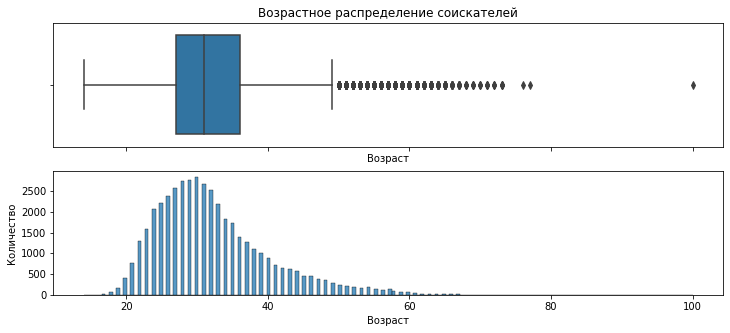

In [49]:
print('Модальное значение возраста соискателей -',
    int(main_df['Возраст'].mode())
    )
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharex=True)

sns.histplot(
    data=main_df,
    x='Возраст',
    ax=axes[1]
)
sns.boxplot(
    data=main_df,
    x='Возраст',
    ax=axes[0]
)
axes[0].set_title('Возрастное распределение соискателей')
axes[1].set_ylabel('Количество');

----

### Задание 4.2 ###

Чему равен максимальный опыт работы (в месяцах)?

***Ответ - 1188***

Минимальный опыт соискателей - 1.0
Максимальный опыт соискателей - 1188.0
Модальное значение опыта соискателей - 81


count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

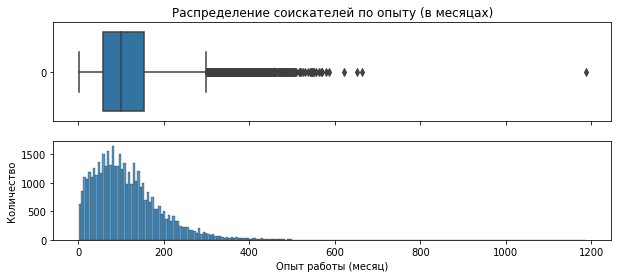

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
sns.boxplot(
    data=main_df['Опыт работы (месяц)'],
    orient='h',
    ax=axes[0]
)
sns.histplot(
    data=main_df['Опыт работы (месяц)'],
    ax=axes[1]
)
axes[0].set_title('Распределение соискателей по опыту (в месяцах)')
axes[1].set_ylabel('Количество');

print('Минимальный опыт соискателей -', main_df['Опыт работы (месяц)'].min())
print('Максимальный опыт соискателей -', main_df['Опыт работы (месяц)'].max())
print('Модальное значение опыта соискателей -', int(main_df['Опыт работы (месяц)'].mode()))
main_df['Опыт работы (месяц)'].describe()

----

### Задание 4.3 ###

Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

***Ответ - 5***

In [59]:
main_df['ЗП (руб)'].shape[0]

44744

In [61]:
main_df[main_df['ЗП (руб)'] > 1000000].shape[0]

5

In [62]:
main_df[main_df['ЗП (руб)'] > 500_000].shape[0]

32

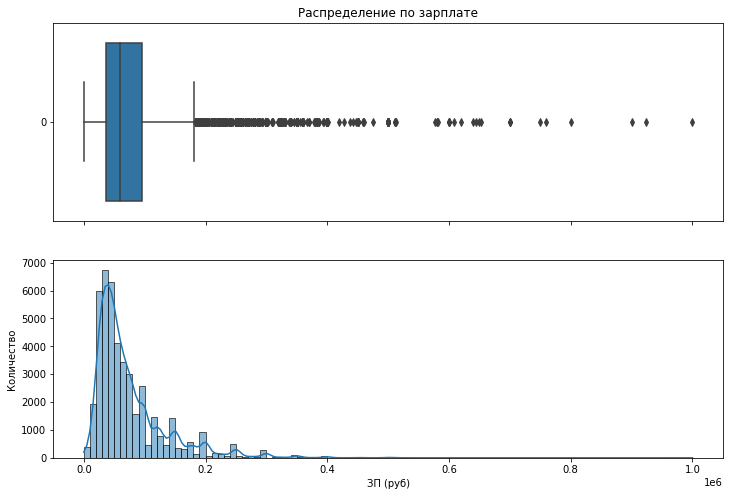

In [64]:
fixed_salary_ser = main_df[main_df['ЗП (руб)'] <= 1_000_000]['ЗП (руб)']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
sns.boxplot(
    data=fixed_salary_ser,
    orient='h',
    ax=axes[0]
)
sns.histplot(
    data=fixed_salary_ser,
    kde=True,
    bins=100,
    ax=axes[1]
)
axes[0].set_title('Распределение по зарплате')
axes[1].set_ylabel('Количество');


----

###  Задание 4.4 ###

Какая категория образования оплачивается выше всех по медианному показателю?

***Ответ - Высшее***

,ЗП (руб)
Образование,
Высшее,60000.0
Неоконченное высшее,50000.0
Среднее,40000.0
Среднее специальное,40000.0


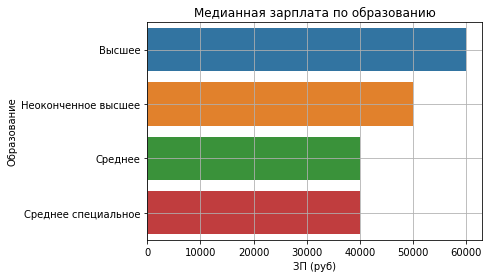

In [80]:
edu_sal_df = main_df[main_df['ЗП (руб)'] <= 1_000_000][['ЗП (руб)', 'Образование']].groupby('Образование', as_index=True).median()
display(edu_sal_df)
barplot = sns.barplot(
    data=edu_sal_df,
    x='ЗП (руб)',
    y=edu_sal_df.index
)
barplot.set_title('Медианная зарплата по образованию')
barplot.grid()

----

### Задание 4.5 ###

В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

***Ответ - другие***

Медианные зарплаты по городам:


,ЗП (руб)
Город,
Москва,85000.0
Санкт-Петербург,60000.0
город-миллионник,40000.0
другие,40000.0


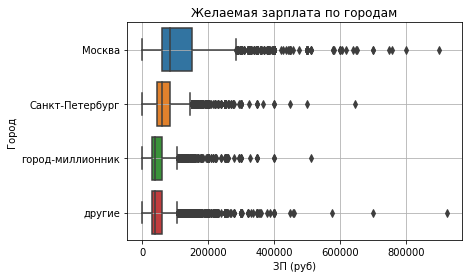

In [84]:
sal_city_df = main_df[main_df['ЗП (руб)'] < 1_000_000][['ЗП (руб)', 'Город']]
boxgraph = sns.boxplot(
    data=sal_city_df,
    x='ЗП (руб)',
    y='Город',
)
boxgraph.set_title('Желаемая зарплата по городам')
boxgraph.grid();

median_salary_df = main_df[main_df['ЗП (руб)'] < 1_000_000][['ЗП (руб)', 'Город']].groupby('Город').median()
print('Медианные зарплаты по городам:')
display(median_salary_df)

----

### Задание 4.6 ###

Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).

***Ответ - 66***

,Готовность к переезду,Готовность к командировкам,ЗП (руб)
0,False,False,40000.0
1,False,True,60000.0
2,True,False,50000.0
3,True,True,65554.7


66


Text(0.5, 1.0, 'Медианная зарплата при готовности к переезду и командировкам')

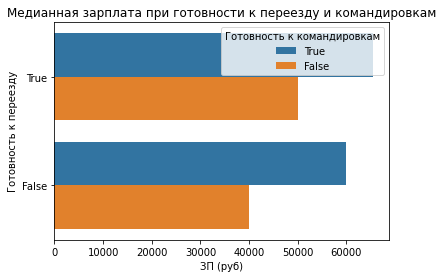

In [124]:
# main_df.info()
mov_mis_df = main_df[main_df['ЗП (руб)'] < 1_000_000]\
    [['ЗП (руб)', 'Готовность к переезду', 'Готовность к командировкам']]\
    .groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False).median()
display(mov_mis_df)
# display(mov_mis_df.loc[(mov_mis_df['Готовность к переезду'] == True) & (mov_mis_df['Готовность к командировкам'] == True), 'ЗП (руб)'])
cell = mov_mis_df['ЗП (руб)'].loc[(mov_mis_df['Готовность к переезду'] == True) & (mov_mis_df['Готовность к командировкам'] == True)]
print(round(float(cell) / 1000))

bargraph = sns.barplot(
    data=mov_mis_df,
    x='ЗП (руб)',
    y='Готовность к переезду',
    hue='Готовность к командировкам',
    orient='h',
    order=[True, False],
    hue_order=[True, False]
)
bargraph.set_title('Медианная зарплата при готовности к переезду и командировкам')

----

### Задание 4.7 ###

Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?

***Ответ - Высшее***

Возраст,14,15,16,17,18,19,20,21,22,23,...,66,67,68,69,70,71,72,73,76,77
Образование,,,,,,,,,,,,,,,,,,,,,
Высшее,60000,0,122582.49,90075.5,30000,30000,30000,35000,40000,45000,...,65000,70000,79000,112500,80000,75000,75000,62500,45000,90000
Неоконченное высшее,0,0,0.00,80000.0,25000,30000,31000,35000,40000,40000,...,0,0,0,0,0,0,0,0,0,0
Среднее,0,10000,0.00,44000.0,35000,45000,29000,40000,40000,35000,...,0,0,0,0,0,0,0,0,0,0
Среднее специальное,0,2000,30000.00,25000.0,25151,30000,30000,30000,30000,35000,...,0,120000,0,0,0,0,0,0,0,0


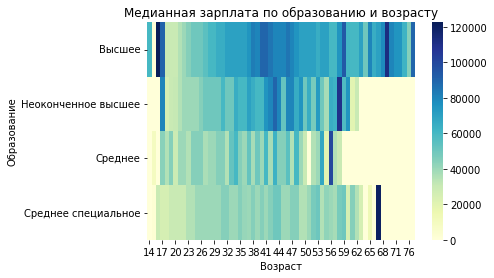

In [202]:
age_edu_df = main_df[(main_df['ЗП (руб)'] < 1_000_000) & (main_df['Возраст'] < 80)].pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    dropna=True,
    fill_value=0,
    sort=True,
    aggfunc='median'
)
display(age_edu_df)

heatgraph = sns.heatmap(
    data=age_edu_df,
    cmap='YlGnBu'
)
heatgraph.set_title('Медианная зарплата по образованию и возрасту');

Возраст  Образование          ЗП (руб) 
14       Высшее               60000.00      60000.00
15       Среднее              10000.00      10000.00
         Среднее специальное  2000.00        2000.00
16       Высшее               122582.49    122582.49
         Среднее специальное  16000.00      16000.00
                                             ...    
73       Высшее               50000.00      50000.00
                              75000.00      75000.00
                              85000.00      85000.00
76       Высшее               45000.00      45000.00
77       Высшее               90000.00      90000.00
Name: ЗП (руб), Length: 6534, dtype: float64

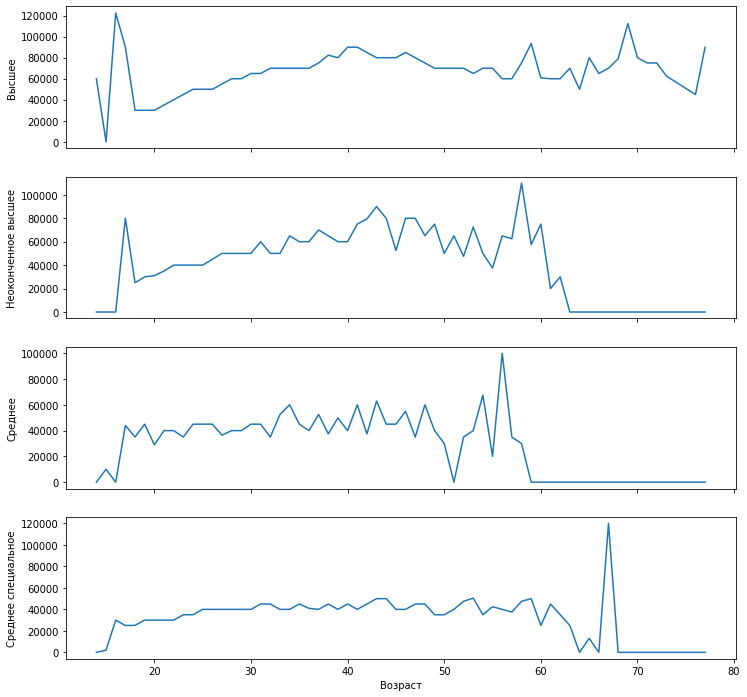

In [206]:
age_edu_1 = main_df[(main_df['ЗП (руб)'] < 1_000_000) & (main_df['Возраст'] < 80)]\
    .groupby(['Возраст', 'Образование', 'ЗП (руб)'], as_index=True)['ЗП (руб)'].median()
display(age_edu_1)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)
sns.lineplot(
    data=age_edu_df.loc['Высшее'],
    ax=axes[0]
)
sns.lineplot(
    data=age_edu_df.loc['Неоконченное высшее'],
    ax=axes[1]
)
sns.lineplot(
    data=age_edu_df.loc['Среднее'],
    ax=axes[2]
)
sns.lineplot(
    data=age_edu_df.loc['Среднее специальное'],
    ax=axes[3]
);

----

### Задание 4.8 ###

Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.

***Ответ - 7***